In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/a/Downloads/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [215]:
def detect_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    
    boundary=1.5*iqr
    
    index1=df[df > q3+boundary].index
    index2=df[df < q1-boundary].index 
    
    df=df.drop(index1)
    df=df.drop(index2)
    
    return df

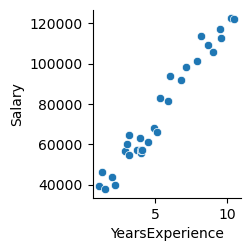

In [216]:
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],kind='scatter')
plt.show()

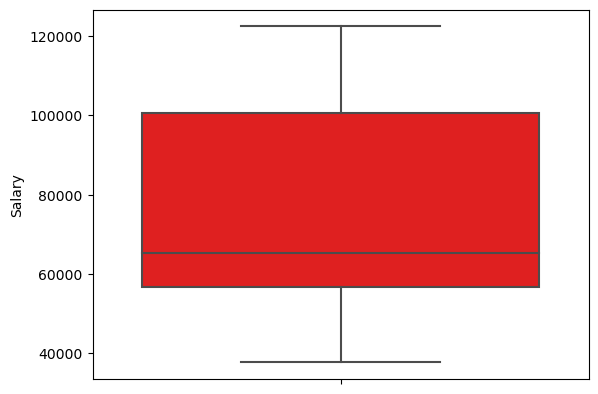

In [217]:
sns.boxplot(data=df, y="Salary", color="red")
plt.show()

In [218]:
X = df['YearsExperience']
X = detect_outliers(X)
X = X.to_numpy()

In [219]:
y = df['Salary']
y = detect_outliers(y)
y = y.to_numpy()

In [220]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [221]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X=sc.fit_transform(X)

In [222]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    X, y,test_size=0.2, random_state=0)

In [223]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9411949620562126
0.988169515729126


In [224]:
print(lr.coef_, lr.intercept_)

[[25983.84618192]] [76260.91499065]


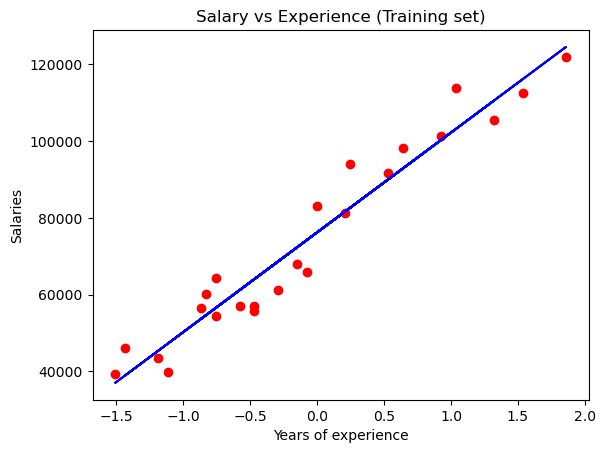

In [225]:
#plot for the TRAIN
plt.scatter(train_input, train_target, color='red') # plotting the observation line
 
plt.plot(train_input, lr.predict(train_input), color='blue') # plotting the regression line
 
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
 
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

In [226]:
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측을 만듭니다
y_prediction = lr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, y_prediction)
print(mae)

2446.1723690465064
